# 最小二乘法OLS线性回归

In [1]:
# 简单线性回归
fit1 <- lm(weight ~ height,data=women)
fit1


Call:
lm(formula = weight ~ height, data = women)

Coefficients:
(Intercept)       height  
     -87.52         3.45  


In [2]:
summary(fit1)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [3]:
head(residuals(fit1))

1           2           3           4           5           6 
 2.41666667  0.96666667  0.51666667  0.06666667 -0.38333333 -0.83333333

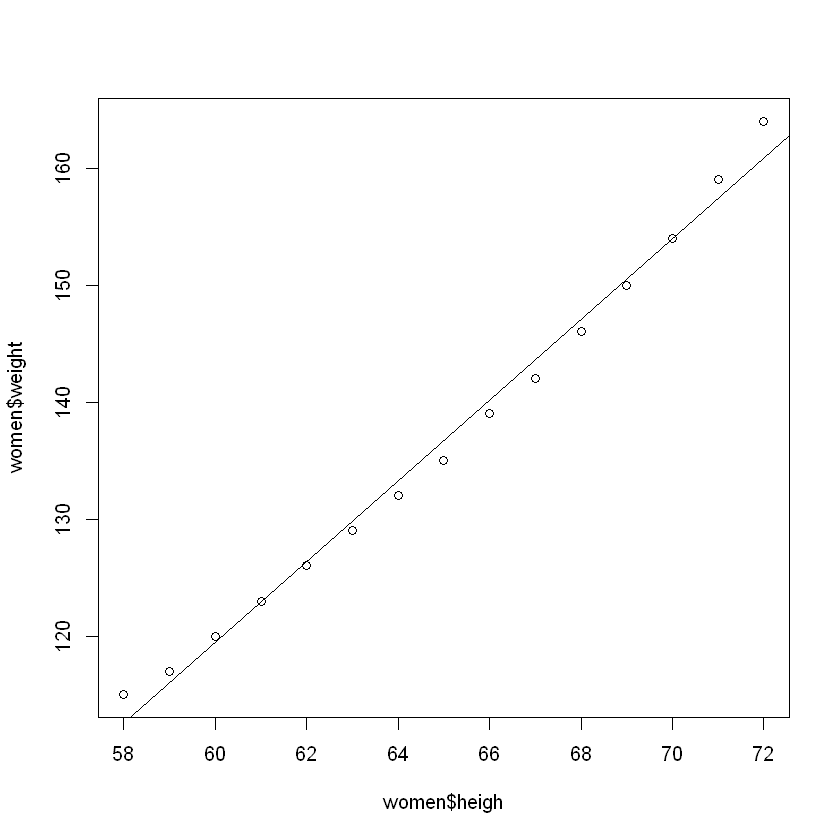

In [4]:
plot(women$heigh,women$weight)
abline(fit1)

In [5]:
# 多项式回归
fit2 <- lm(weight ~ height + I(height^2), data=women)
fit2


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Coefficients:
(Intercept)       height  I(height^2)  
  261.87818     -7.34832      0.08306  


In [6]:
summary(fit2)


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


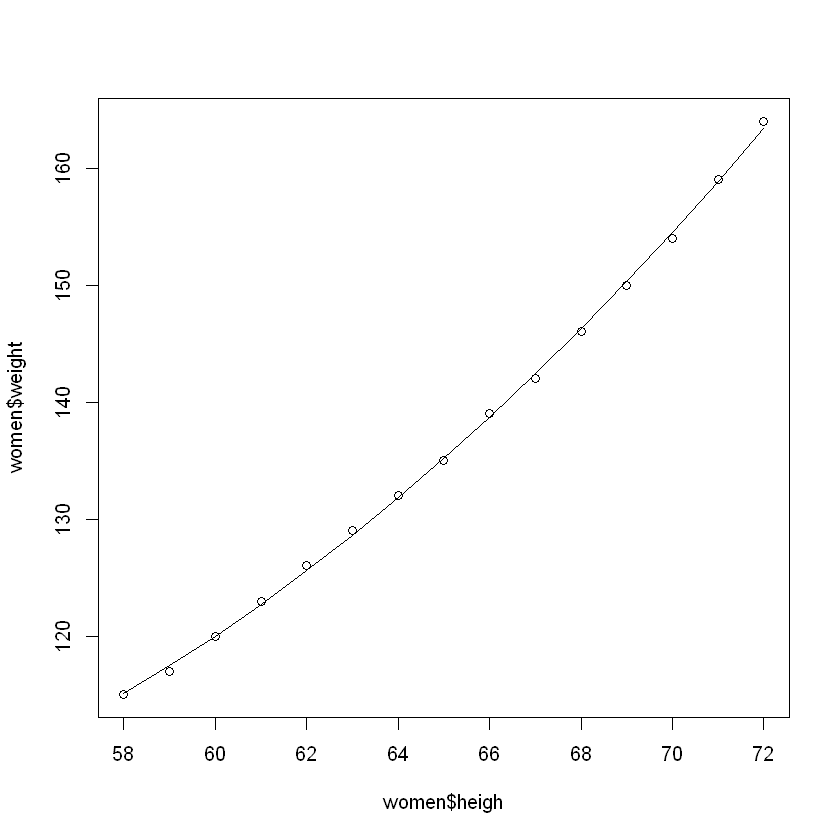

In [7]:
plot(women$heigh,women$weight)
lines(women$height,fitted(fit2))

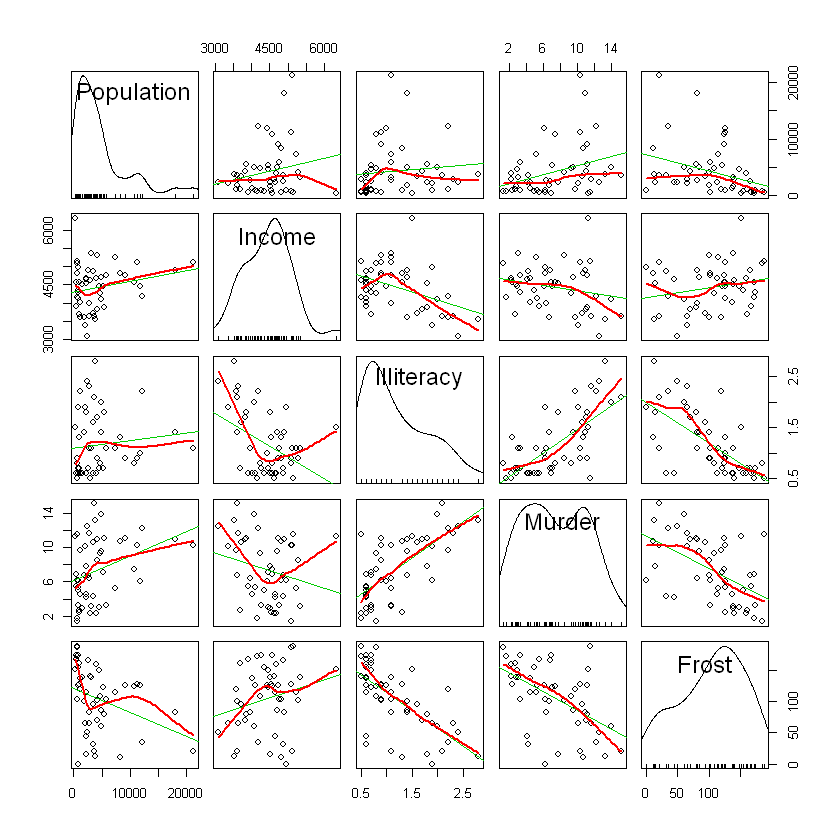

In [8]:
# 多元线性回归
states <- as.data.frame(state.x77[,c(1,2,3,5,7)])
car::scatterplotMatrix(states,spread=FALSE)

In [9]:
fit3 <- lm(Murder ~ Population + Illiteracy + Income + Frost,         
           data=states)
fit3


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Coefficients:
(Intercept)   Population   Illiteracy       Income        Frost  
  1.235e+00    2.237e-04    4.143e+00    6.442e-05    5.813e-04  


In [10]:
summary(fit3)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


In [11]:
# 有交互项的多元线性回归
fit4 <- lm(mpg ~ hp + wt + hp:wt, data=mtcars)
fit4


Call:
lm(formula = mpg ~ hp + wt + hp:wt, data = mtcars)

Coefficients:
(Intercept)           hp           wt        hp:wt  
   49.80842     -0.12010     -8.21662      0.02785  


In [12]:
summary(fit4)


Call:
lm(formula = mpg ~ hp + wt + hp:wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp:wt        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


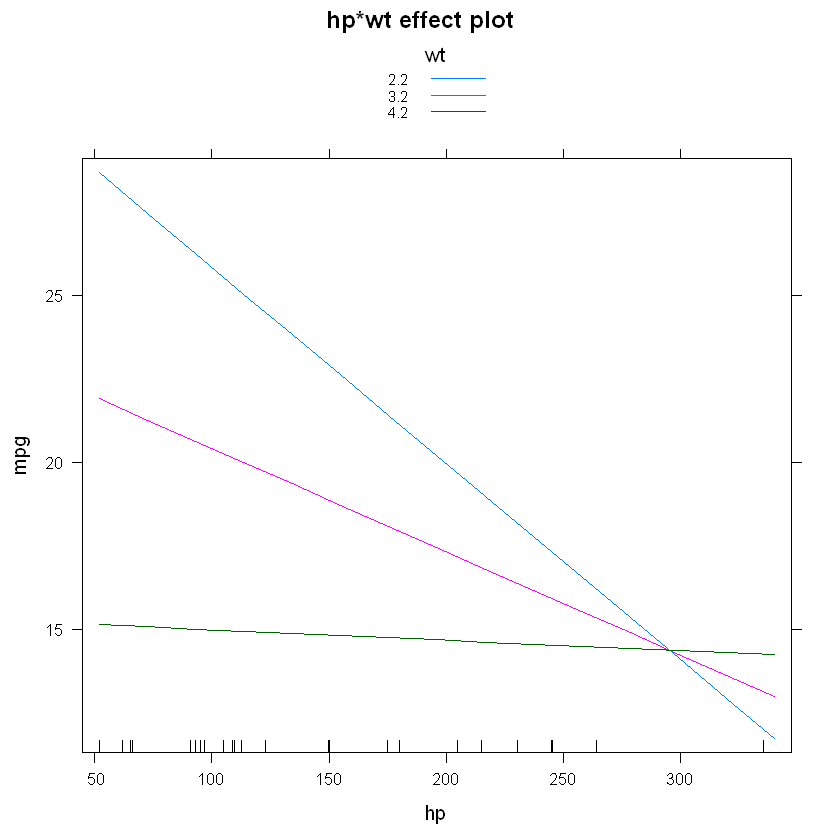

In [13]:
plot(effects::effect("hp:wt", fit4, xlevels=list(wt=c(2.2,3.2,4.2))),
     multiline=TRUE)
# 随着车重的增加，马力与每加仑汽油行驶英里数的关系减弱了

# 回归诊断

In [14]:
# 置信区间
confint(fit3)
# 结果表明，文盲率改变1%，谋杀率就在95%的置信区间[2.38,5.90]中变化。
# 另外，因为Frost的置信区间包含0，可以得出结论说，当其他变量不变时，温度的改变与谋杀率无关。
# 不过，你对这些结果的信念，都只建立在你的数据满足统计假设的前提之上。

,2.5 %,97.5 %
(Intercept),-6.552191e+00,9.0213182149
Population,4.136397e-05,0.0004059867
Illiteracy,2.381799e+00,5.9038743192
Income,-1.312611e-03,0.0014414600
Frost,-1.966781e-02,0.0208304170


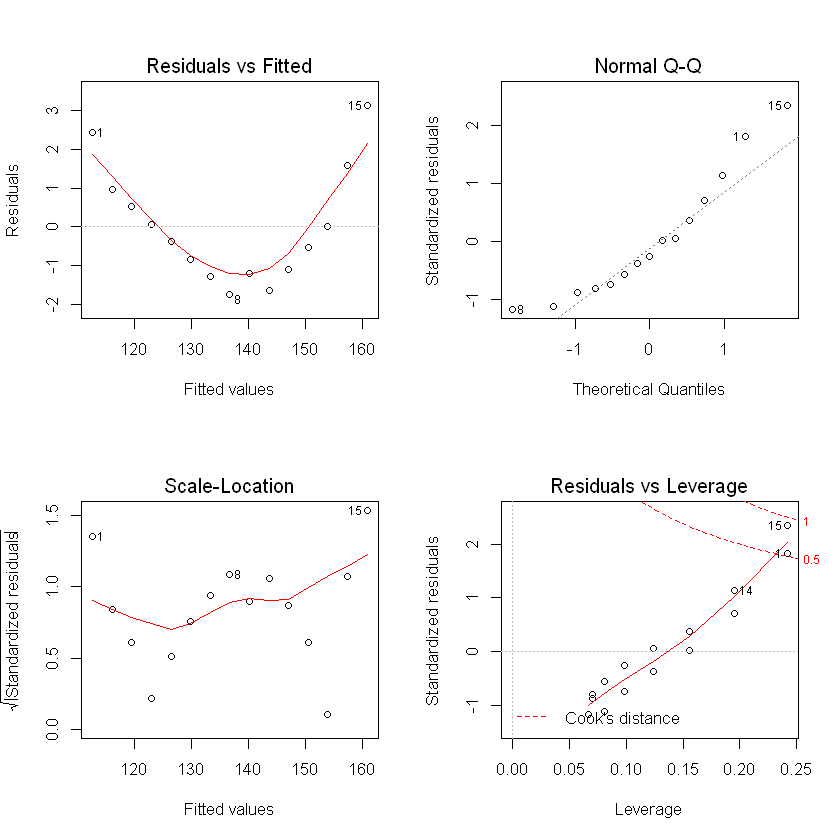

In [15]:
# 通过图形检验回归分析
par(mfrow = c(2,2))
plot(fit1)

1. 正态性 当预测变量值固定时，因变量成正态分布，则残差值也应该是一个均值为0的正态分布。正态Q-Q图（Normal Q-Q，右上）是在正态分布对应的值下，标准化残差的概率图。若满足正态假设，那么图上的点应该落在呈45度角的直线上；若不是如此，那么就违反了正态性的假设。
2. 独立性 你无法从这些图中分辨出因变量值是否相互独立，只能从收集的数据中来验证。上面的例子中，没有任何先验的理由去相信一位女性的体重会影响另外一位女性的体重。假若你发现数据是从一个家庭抽样得来的，那么可能必须要调整模型独立性的假设。
3. 线性 若因变量与自变量线性相关，那么残差值与预测（拟合）值就没有任何系统关联。换句话说，除了白噪声，模型应该包含数据中所有的系统方差。在“残差图与拟合图”（Residuals vs Fitted，左上）中可以清楚的看到一个曲线关系，这暗示着你可能需要对回归模型加上一个二次项。
4. 同方差性 若满足不变方差假设，那么在位置尺度图（Scale-Location Graph，左下）中，水平线周围的点应该随机分布。该图似乎满足此假设。
5. 最后一幅“残差与杠杆图”（Residuals vs Leverage，右下）提供了你可能关注的单个观测点的信息。从图形可以鉴别出离群点、高杠杆值点和强影响点。下面来详细介绍。
    1. 一个观测点是离群点，表明拟合回归模型对其预测效果不佳（产生了巨大的或正或负的残差）。    
    2. 一个观测点有很高的杠杆值，表明它是一个异常的预测变量值的组合。也就是说，在预测变量空间中，它是一个离群点。因变量值不参与计算一个观测点的杠杆值。    
    3. 一个观测点是强影响点（influential observation），表明它对模型参数的估计产生的影响过大，非常不成比例。强影响点可以通过Cook距离即Cook’s D统计量来鉴别。

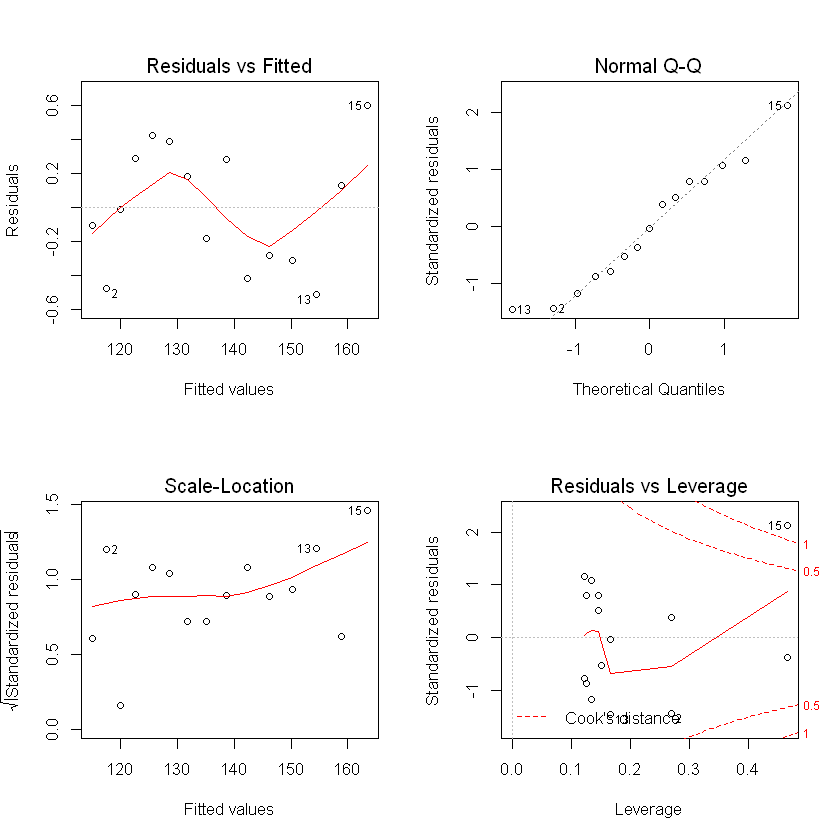

In [16]:
# 通过图形检验回归分析
par(mfrow = c(2,2))
plot(fit2)

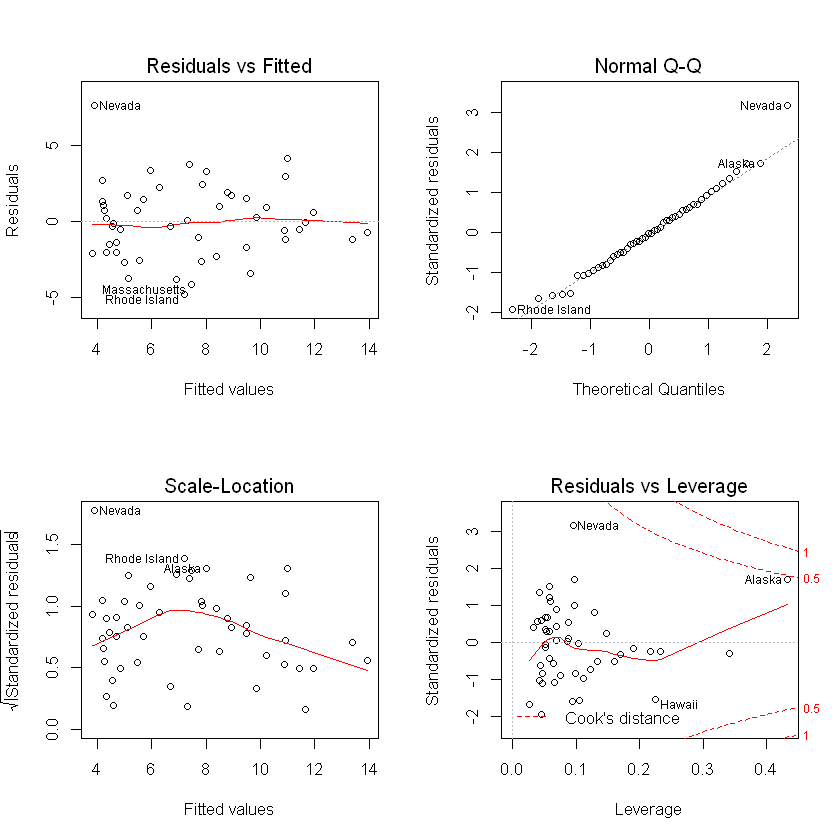

In [17]:
# 通过图形检验回归分析
par(mfrow = c(2,2))
plot(fit3)

# 改进的方法

In [18]:
# car包提供了大量函数，大大增强了拟合和评价回归模型的能力
# gvlma包提供了对所有线性模型假设进行检验的方法
# qqplot 已有
# 误差的独立性 Drubin-Watson检验
car::durbinWatsonTest(fit3)
# p值不显著说明无自相关性，误差项之间独立

 lag Autocorrelation D-W Statistic p-value
   1      -0.2006929      2.317691   0.274
 Alternative hypothesis: rho != 0

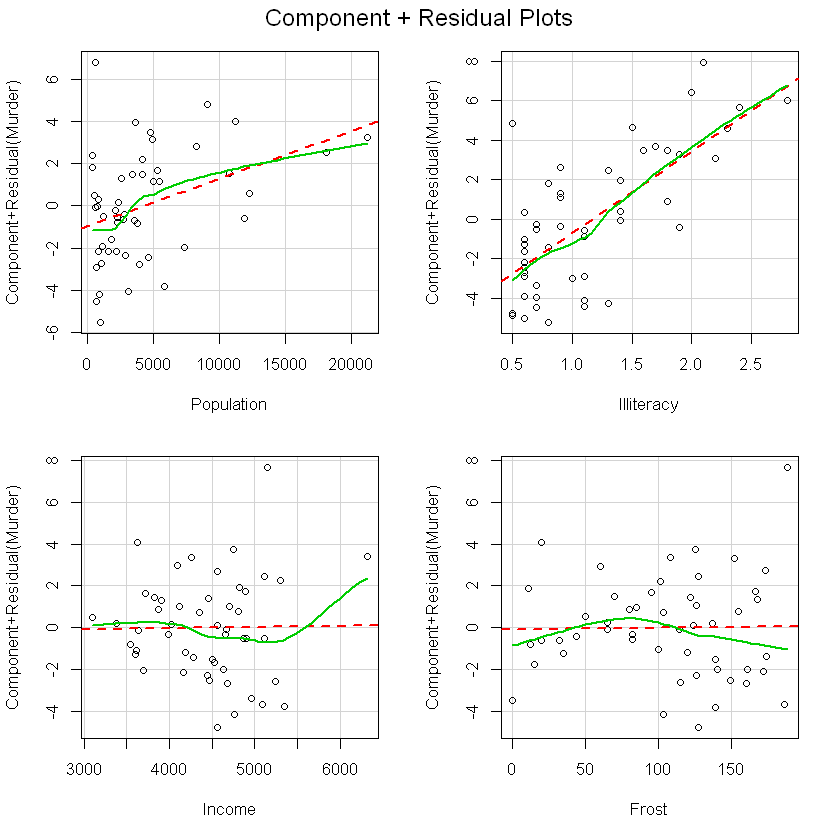

In [19]:
# 偏残差图
# 通过成分残差图（component plus residual plot）
# 也称偏残差图（partial residual plot），
# 你可以看看因变量与自变量之间是否呈非线性关系，
# 也可以看看是否有不同于已设定线性模型的系统偏差
car::crPlots(fit3)

In [20]:
# 判断误差方差是否恒定
car::ncvTest(fit3)
# 生成一个计分检验，零假设为误差方差不变，
# 备择假设为误差方差随着拟合值水平的变化而变化。
# 若检验显著，则说明存在异方差性（误差方差不恒定）

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.746514    Df = 1     p = 0.1863156 


Suggested power transformation:  1.209626 

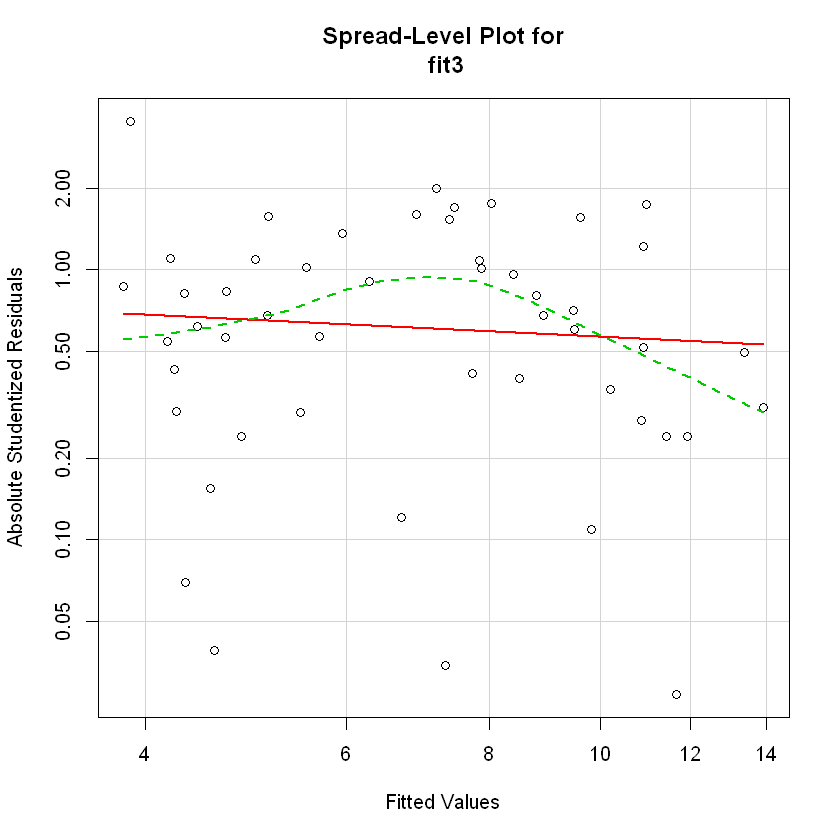

In [21]:
car::spreadLevelPlot(fit3)
# 分布水平图
# 点在水平的最佳拟合曲线周围呈水平随机分布
# 若违反了该假设,你将会看到一个非水平的曲线

# 多元线性回归

In [22]:
states <- as.data.frame(state.x77[,c(1,2,3,5,7)])
fit3 <- lm(Murder ~ Population + Illiteracy + Income + Frost,
         data=states)
fit3


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Coefficients:
(Intercept)   Population   Illiteracy       Income        Frost  
  1.235e+00    2.237e-04    4.143e+00    6.442e-05    5.813e-04  


In [23]:
# 综合验证
#能对线性模型假设进行综合验证
#同时还能做偏斜度、峰度和异方差性的评价
#给模型假设提供了一个单独的综合检验（通过/不通过）
library(gvlma)
gvmodel <- gvlma(fit3)
summary(gvmodel)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit3) 

                    Value p-value                Decision
Global Stat        2.7728  0.5965

In [24]:
# 多重共线性
# 多重共线性可用统计量VIF
#（Variance Inflation Factor，方差膨胀因子）进行检测
# VIF的平方根表示变量回归参数的置信区间能膨胀为与模型无关的预测变量的程度
# sqrt(vif) >2就表明存在多重共线性问题。
sqrt(car::vif(fit3)) >2

Population Illiteracy     Income      Frost 
     FALSE      FALSE      FALSE      FALSE

In [25]:
# 异常值观测
# 离群点
# 标准化残差值大于2或者小于2的点可能是离群点
# 求得最大标准化残差绝对值Bonferroni调整后的p值
car::outlierTest(fit3)

       rstudent unadjusted p-value Bonferonni p
Nevada 3.542929         0.00095088     0.047544

integer(0)

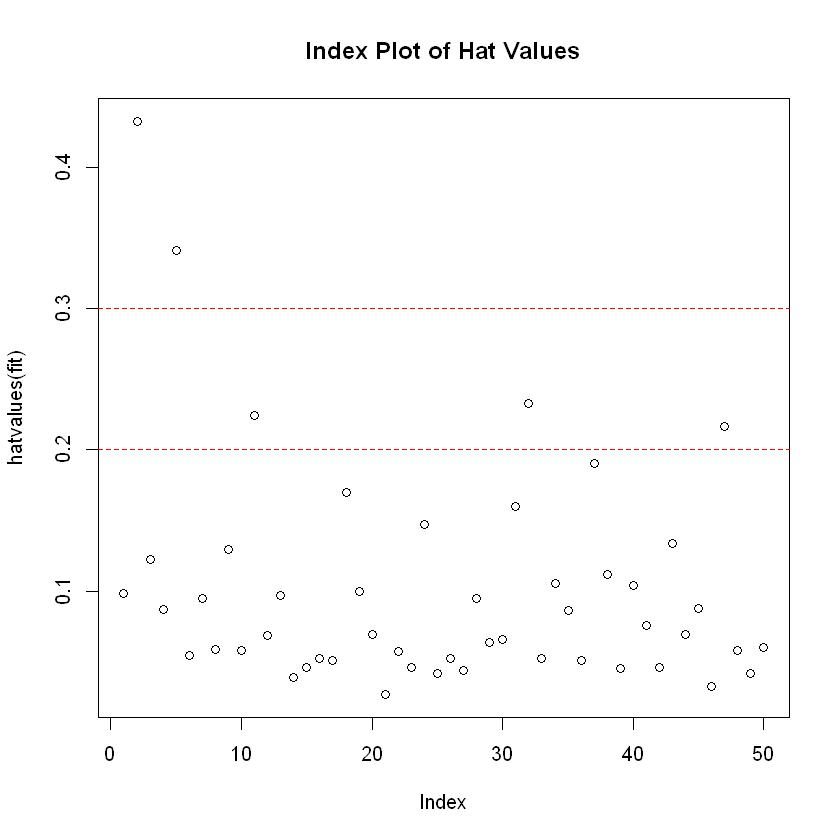

In [26]:
# 高杠杆值点
# 高杠杆值的观测点可通过帽子统计量（hat statistic）判断
# 帽子均值为p/n，其中p是模型估计的参数数目（包含截距项）n是样本量
# 一般来说，若观测点的帽子值大于帽子均值的2或3倍，即可以认定为高杠杆值点
had.plot <- function(fit) {
    p <- length(coefficients(fit))
    n <- length(fitted(fit))
    plot(hatvalues(fit), main="Index Plot of Hat Values")
    abline(h=c(2,3)*p/n, col="red",lty=2)
    identify(1:n,hatvalues(fit),names(hatvalues(fit)))
}
had.plot(fit3)

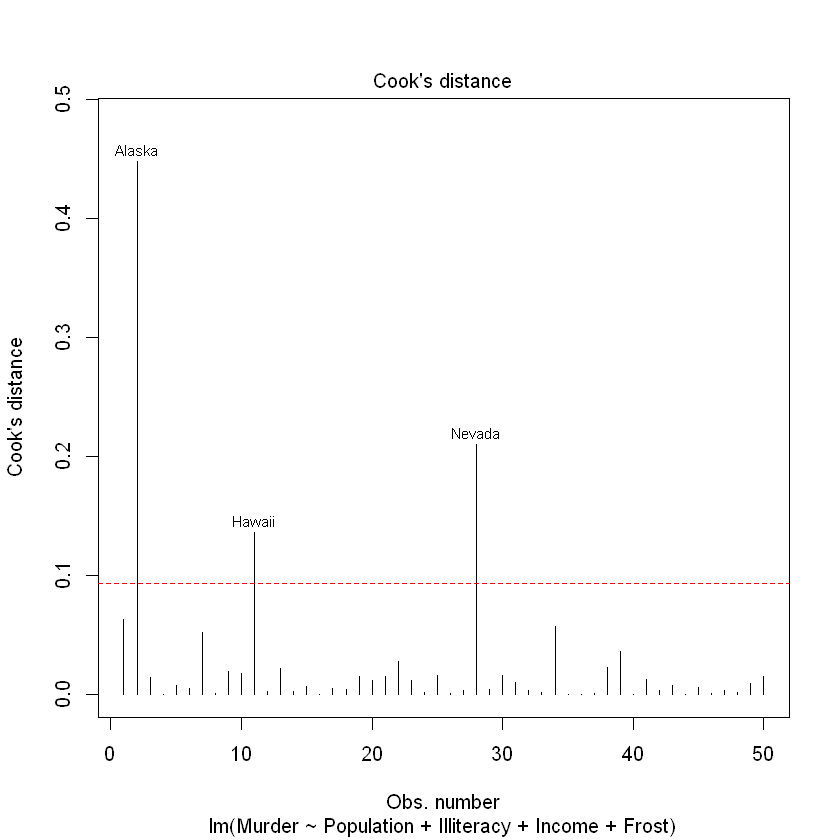

In [27]:
# 强影响点
# Cook’s D值大于4/(n-k-1)，则表明它是强影响点
# 中n 为样本量大小，k 是预测变量数目
cutoff <- 4/(nrow(states)-length(fit3$coefficients)-2)
plot(fit3,which=4,cook.levels=cutoff)
abline(h=cutoff,lty=2,col="red")

,StudRes,Hat,CookD
Alaska,1.753692,0.43247319,0.4480510
Nevada,3.542929,0.09508977,0.2099157


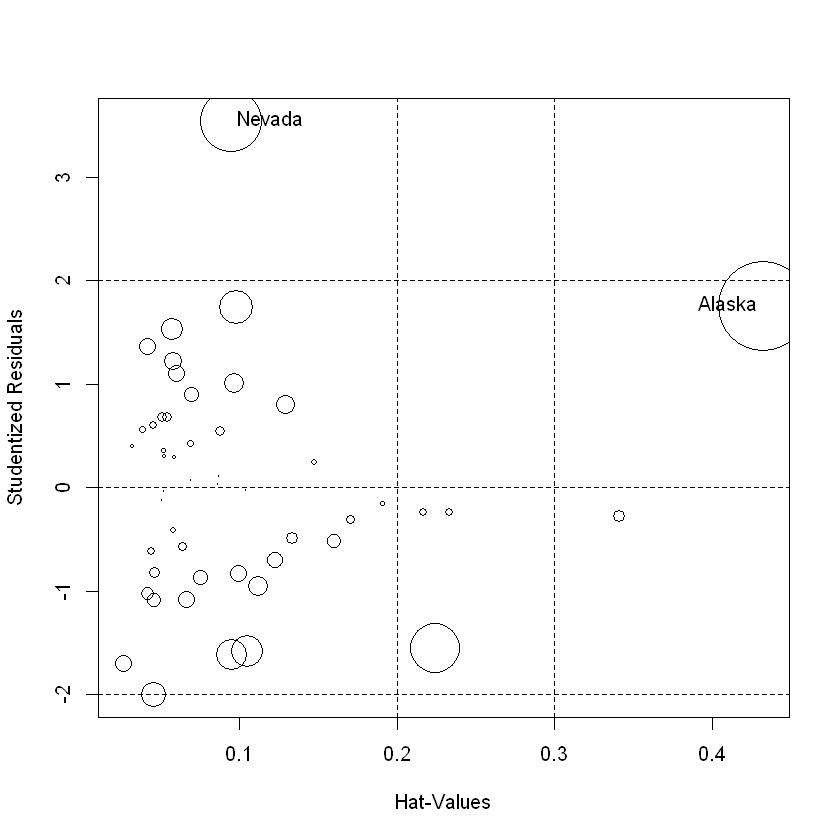

In [28]:
# 以将离群点、杠杆值和强影响点的信息整合到一幅图形
car::influencePlot(fit3,id.method="dientify")
# 纵坐标超过2或小于-2的是离群点
# 水平轴超过0.2或0.3的是高杠杆值
# 圆圈很大的点可能是强影响点

# 变量选择

In [29]:
# AIC（Akaike Information Criterion，赤池信息准则）
# AIC值越小的模型要优先选择
# 它说明模型用较少的参数获得了足够的拟合度

In [30]:
# 逐步回归
# forward/backward/stepwise
MASS::stepAIC(fit3,direction = "backward")

Start:  AIC=97.75
Murder ~ Population + Illiteracy + Income + Frost

             Df Sum of Sq    RSS     AIC
- Frost       1     0.021 289.19  95.753
- Income      1     0.057 289.22  95.759
<none>                    289.17  97.749
- Population  1    39.238 328.41 102.111
- Illiteracy  1   144.264 433.43 115.986

Step:  AIC=95.75
Murder ~ Population + Illiteracy + Income

             Df Sum of Sq    RSS     AIC
- Income      1     0.057 289.25  93.763
<none>                    289.19  95.753
- Population  1    43.658 332.85 100.783
- Illiteracy  1   236.196 525.38 123.605

Step:  AIC=93.76
Murder ~ Population + Illiteracy

             Df Sum of Sq    RSS     AIC
<none>                    289.25  93.763
- Population  1    48.517 337.76  99.516
- Illiteracy  1   299.646 588.89 127.311



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Coefficients:
(Intercept)   Population   Illiteracy  
  1.6515497    0.0002242    4.0807366  


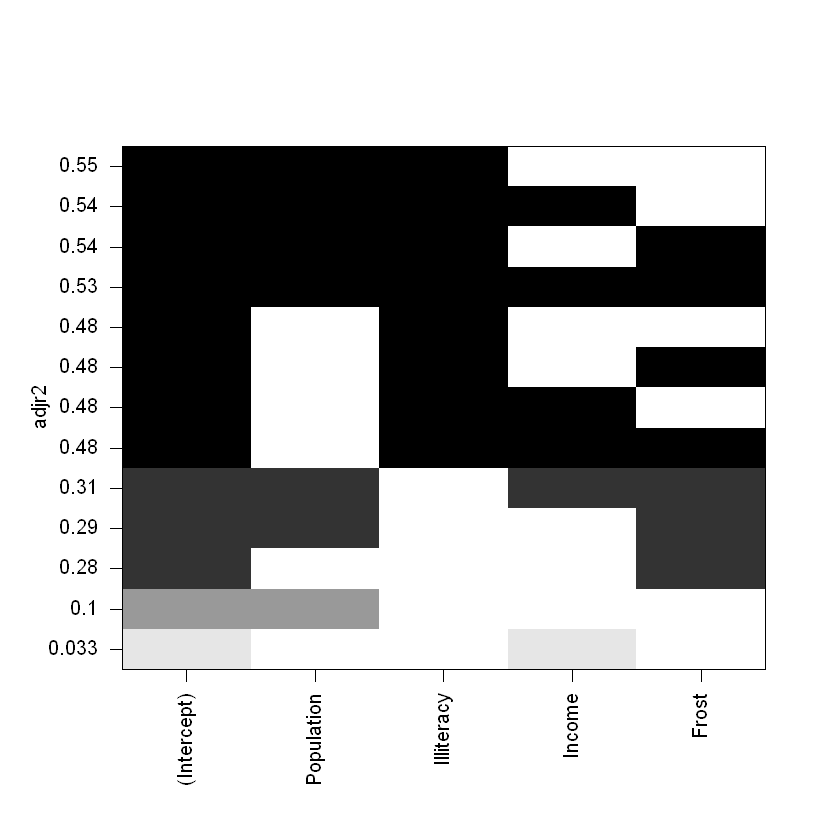

In [31]:
# 全子集回归
theleaps <- leaps::regsubsets(Murder ~ Population + Illiteracy + Income + Frost,
         data=states, nbest=4)
plot(theleaps,scale="adjr2")

In [32]:
# 深层次分析
# k 重交叉验证
# bootstrap 包中的 crossval() 函数

In [33]:
# 相对重要性
zstates <- as.data.frame(scale(states))
zfit <- lm(Murder ~ Population + Illiteracy + Income + Frost,
         data=zstates)
coef(zfit)
# 当其他因素不变时，文盲率一个标准差的变化将增加0.68个标准差的谋杀率
# 根据标准化的回归系数，我们可认为Illiteracy是最重要的预测变量
# 而Frost是最不重要的

(Intercept)    Population    Illiteracy        Income         Frost 
-2.054026e-16  2.705095e-01  6.840496e-01  1.072372e-02  8.185407e-03

In [34]:
# 相对权重

# 广义线性模型

In [35]:
# glm()函数
# glm(formula, family=family(link=function),data= )
# 模型参数估计的推导依据的是极大似然估计，而非最小二乘法

- logistic回归

In [36]:
# 导入数据,数据概况
data(Affairs,package="AER")
summary(Affairs)

    affairs          gender         age         yearsmarried    children 
 Min.   : 0.000   female:315   Min.   :17.50   Min.   : 0.125   no :171  
 1st Qu.: 0.000   male  :286   1st Qu.:27.00   1st Qu.: 4.000   yes:430  
 Median : 0.000                Median :32.00   Median : 7.000            
 Mean   : 1.456                Mean   :32.49   Mean   : 8.178            
 3rd Qu.: 0.000                3rd Qu.:37.00   3rd Qu.:15.000            
 Max.   :12.000                Max.   :57.00   Max.   :15.000            
 religiousness     education       occupation        rating     
 Min.   :1.000   Min.   : 9.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:14.00   1st Qu.:3.000   1st Qu.:3.000  
 Median :3.000   Median :16.00   Median :5.000   Median :4.000  
 Mean   :3.116   Mean   :16.17   Mean   :4.195   Mean   :3.932  
 3rd Qu.:4.000   3rd Qu.:18.00   3rd Qu.:6.000   3rd Qu.:5.000  
 Max.   :5.000   Max.   :20.00   Max.   :7.000   Max.   :5.000  

In [37]:
table(Affairs$affairs)


  0   1   2   3   7  12 
451  34  17  19  42  38 

In [38]:
head(Affairs)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
4,0,male,37,10.00,no,3,18,7,4
5,0,female,27,4.00,no,4,14,6,4
11,0,female,32,15.00,yes,1,12,1,4
16,0,male,57,15.00,yes,5,18,6,5
23,0,male,22,0.75,no,2,17,6,3
29,0,female,32,1.50,no,2,17,5,5


In [39]:
# 将affairs转化为二值型因子ynaffair
Affairs$ynaffair[Affairs$affairs >0] <- 1
Affairs$ynaffair[Affairs$affairs == 0] <- 0
Affairs$ynaffair <- factor(Affairs$ynaffair,
                          levels=c(0,1),
                          labels=c("No","Yes"))
table(Affairs$ynaffair)


 No Yes 
451 150 

In [40]:
# 该二值型因子现可作为Logistic回归的结果变量
fit.full <- glm(ynaffair ~ gender+age+yearsmarried+
                children+religiousness+education+
                occupation+rating,
                data=Affairs,family=binomial())
summary(fit.full)


Call:
glm(formula = ynaffair ~ gender + age + yearsmarried + children + 
    religiousness + education + occupation + rating, family = binomial(), 
    data = Affairs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5713  -0.7499  -0.5690  -0.2539   2.5191  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.37726    0.88776   1.551 0.120807    
gendermale     0.28029    0.23909   1.172 0.241083    
age           -0.04426    0.01825  -2.425 0.015301 *  
yearsmarried   0.09477    0.03221   2.942 0.003262 ** 
childrenyes    0.39767    0.29151   1.364 0.172508    
religiousness -0.32472    0.08975  -3.618 0.000297 ***
education      0.02105    0.05051   0.417 0.676851    
occupation     0.03092    0.07178   0.431 0.666630    
rating        -0.46845    0.09091  -5.153 2.56e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 675.38 

In [41]:
fit.reduced <- glm(ynaffair ~ age+yearsmarried+
                religiousness+rating,
                data=Affairs,family=binomial())
summary(fit.reduced)


Call:
glm(formula = ynaffair ~ age + yearsmarried + religiousness + 
    rating, family = binomial(), data = Affairs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6278  -0.7550  -0.5701  -0.2624   2.3998  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.93083    0.61032   3.164 0.001558 ** 
age           -0.03527    0.01736  -2.032 0.042127 *  
yearsmarried   0.10062    0.02921   3.445 0.000571 ***
religiousness -0.32902    0.08945  -3.678 0.000235 ***
rating        -0.46136    0.08884  -5.193 2.06e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 675.38  on 600  degrees of freedom
Residual deviance: 615.36  on 596  degrees of freedom
AIC: 625.36

Number of Fisher Scoring iterations: 4


In [42]:
# 比较两个模型
anova(fit.reduced,fit.full, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
596,615.3578,NA,NA,NA
592,609.5104,4,5.847418,0.2108367


In [43]:
# 指数化回归系数
exp(coef(fit.reduced))

(Intercept)           age  yearsmarried religiousness        rating 
    6.8952321     0.9653437     1.1058594     0.7196258     0.6304248

In [44]:
# 指数化回归系数置信区间
exp(confint(fit.reduced))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),2.1255764,23.3506030
age,0.9323342,0.9981470
yearsmarried,1.0448584,1.1718250
religiousness,0.6026782,0.8562807
rating,0.5286586,0.7493370


In [45]:
# 创建一个虚拟数据集
testdata <- data.frame(rating=c(1,2,3,4,5),age=mean(Affairs$age),
                      yearsmarried=mean(Affairs$yearsmarried),
                      religiousness=mean(Affairs$religiousness))
testdata

rating,age,yearsmarried,religiousness
1,32.48752,8.177696,3.116473
2,32.48752,8.177696,3.116473
3,32.48752,8.177696,3.116473
4,32.48752,8.177696,3.116473
5,32.48752,8.177696,3.116473


In [46]:
# 使用测试数据集预测相应的概率
testdata$prob <- predict(fit.reduced, newdata=testdata, 
                         type="response")
testdata

rating,age,yearsmarried,religiousness,prob
1,32.48752,8.177696,3.116473,0.5302296
2,32.48752,8.177696,3.116473,0.4157377
3,32.48752,8.177696,3.116473,0.3096712
4,32.48752,8.177696,3.116473,0.2204547
5,32.48752,8.177696,3.116473,0.1513079


In [47]:
# 过度离势，即观测到的响应变量的方差大于期望的二项分布的方差

- 泊松回归

In [57]:
library(dplyr)

In [49]:
data(breslow.dat, package="robust")

In [50]:
breslow.dat %>% tail()

,ID,Y1,Y2,Y3,Y4,Base,Age,Trt,Ysum,sumY,Age10,Base4
54,218,6,3,4,0,24,41,progabide,13,13,4.1,6.00
55,221,3,5,4,3,16,32,progabide,15,15,3.2,4.00
56,225,1,23,19,8,22,26,progabide,51,51,2.6,5.50
57,228,2,3,0,1,25,21,progabide,6,6,2.1,6.25
58,232,0,0,0,0,13,36,progabide,0,0,3.6,3.25
59,236,1,4,3,2,12,37,progabide,10,10,3.7,3.00


In [51]:
names(breslow.dat) %>% print()

 [1] "ID"    "Y1"    "Y2"    "Y3"    "Y4"    "Base"  "Age"   "Trt"   "Ysum" 
[10] "sumY"  "Age10" "Base4"


In [52]:
summary(breslow.dat[c(6,7,8,10)])

      Base             Age               Trt          sumY       
 Min.   :  6.00   Min.   :18.00   placebo  :28   Min.   :  0.00  
 1st Qu.: 12.00   1st Qu.:23.00   progabide:31   1st Qu.: 11.50  
 Median : 22.00   Median :28.00                  Median : 16.00  
 Mean   : 31.22   Mean   :28.34                  Mean   : 33.05  
 3rd Qu.: 41.00   3rd Qu.:32.00                  3rd Qu.: 36.00  
 Max.   :151.00   Max.   :42.00                  Max.   :302.00  

In [53]:
fit <- glm(sumY ~ Base + Age + Trt, data=breslow.dat, family=poisson())
summary(fit)


Call:
glm(formula = sumY ~ Base + Age + Trt, family = poisson(), data = breslow.dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.0569  -2.0433  -0.9397   0.7929  11.0061  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.9488259  0.1356191  14.370  < 2e-16 ***
Base          0.0226517  0.0005093  44.476  < 2e-16 ***
Age           0.0227401  0.0040240   5.651 1.59e-08 ***
Trtprogabide -0.1527009  0.0478051  -3.194   0.0014 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2122.73  on 58  degrees of freedom
Residual deviance:  559.44  on 55  degrees of freedom
AIC: 850.71

Number of Fisher Scoring iterations: 5


In [54]:
exp(coef(fit)) %>% print()

 (Intercept)         Base          Age Trtprogabide 
   7.0204403    1.0229102    1.0230007    0.8583864 


In [55]:
fit.od <- glm(sumY ~ Base + Age + Trt, data=breslow.dat, family=quasipoisson())

In [56]:
summary(fit.od)


Call:
glm(formula = sumY ~ Base + Age + Trt, family = quasipoisson(), 
    data = breslow.dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.0569  -2.0433  -0.9397   0.7929  11.0061  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.948826   0.465091   4.190 0.000102 ***
Base          0.022652   0.001747  12.969  < 2e-16 ***
Age           0.022740   0.013800   1.648 0.105085    
Trtprogabide -0.152701   0.163943  -0.931 0.355702    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 11.76075)

    Null deviance: 2122.73  on 58  degrees of freedom
Residual deviance:  559.44  on 55  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5
